In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Account
target_user = ["@BBCBreaking", "@CBSNews", "@cnnbrk","@FoxNews","@nytimes"]

# Variables for holding sentiments
sentiments = []

# Loop through each user
for user in target_user:
    
    counter = 1
    oldest_tweet = None
    # Get all tweets from home feed
    public_tweets = api.user_timeline(user, max_id = oldest_tweet, count=100)

    # Loop through all tweets 
    for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
        
            # Add sentiments for each tweet into a list
            sentiments.append({"Account": user,
            "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": counter})
        
            # Add to counter 
            counter = counter + 1

In [3]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)

#Export the dataframe to csv
sentiments_pd.to_csv("sentiments_pd.csv", index=False, header=True)

sentiments_pd.head()

,Account,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,@BBCBreaking,-0.8834,Wed Oct 03 15:59:12 +0000 2018,0.408,0.549,0.043,1
1,@BBCBreaking,-0.8316,Wed Oct 03 15:38:53 +0000 2018,0.423,0.577,0.000,2
2,@BBCBreaking,-0.7269,Wed Oct 03 08:29:50 +0000 2018,0.276,0.724,0.000,3
3,@BBCBreaking,0.0000,Wed Oct 03 07:17:36 +0000 2018,0.000,1.000,0.000,4
4,@BBCBreaking,0.0000,Tue Oct 02 10:37:30 +0000 2018,0.000,1.000,0.000,5


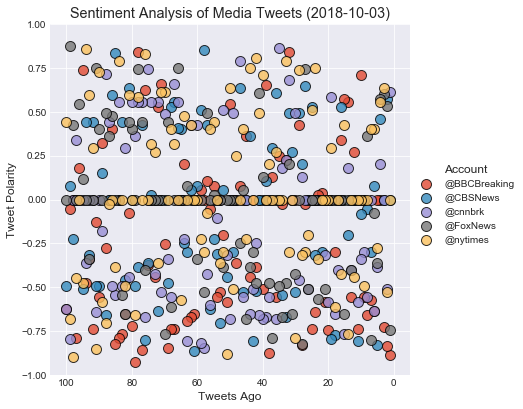

In [80]:
# Using Seaborn to build plot 
sns.set_style(style="darkgrid",rc=None)
g = sns.lmplot(x="Tweets Ago", y="Compound", data= sentiments_pd, hue = "Account", fit_reg = False,size=6, aspect=1, markers='o',scatter = True
, scatter_kws={"s": 100,"edgecolor":"black"})
g.set_axis_labels("Tweets Ago", "Tweet Polarity")
# Using datatime
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")

# limits
plt.xlim(105,-5)
plt.ylim(-1,1)

plt.gcf().subplots_adjust(top=0.9) #adjusting the figure
plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

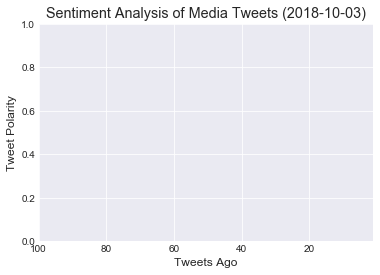